In [6]:
%%capture
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '85bae2eb-b23c-4cb9-8688-f52aa6640e58',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [3]:
type(data)

dict

In [7]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [11]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10830,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.963855e+07,1.963855e+07,False,NaN,1,None,None,None,2024-02-26T20:37:00.000Z,54432.132562,3.188442e+10,106.3285,0.079066,5.116759,4.884303,29.562726,27.977114,42.715390,1.068968e+12,51.4516,1.143075e+12,None,2024-02-26T20:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 15:40:16.784997
1,1027,Ethereum,ETH,ethereum,8460,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201554e+08,1.201554e+08,True,NaN,2,None,None,None,2024-02-26T20:37:00.000Z,3182.278458,1.748467e+10,27.2428,0.324053,2.713207,8.487115,40.007337,35.336491,54.573203,3.823681e+11,18.4007,3.823681e+11,None,2024-02-26T20:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 15:40:16.784997
2,825,Tether USDt,USDT,tether,76011,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.791073e+10,1.016001e+11,True,NaN,3,None,None,None,2024-02-26T20:36:00.000Z,1.000249,6.019915e+10,69.3155,-0.043703,0.033212,0.018716,0.024481,-0.028674,0.021754,9.793508e+10,4.7149,1.016253e+11,None,2024-02-26T20:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-26 15:40:16.784997
3,1839,BNB,BNB,bnb,2075,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495430e+08,1.495430e+08,False,NaN,4,None,None,None,2024-02-26T20:36:00.000Z,401.697592,1.936774e+09,52.9834,0.768181,3.321897,13.889280,31.459426,24.123123,74.333881,6.007105e+10,2.8920,6.007105e+10,None,2024-02-26T20:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 15:40:16.784997
4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.412023e+08,5.705436e+08,True,NaN,5,None,None,None,2024-02-26T20:37:00.000Z,109.238661,2.173942e+09,138.3779,-0.222630,5.133024,-2.631038,17.402728,9.840293,87.543933,4.819634e+10,2.3194,6.232542e+10,None,2024-02-26T20:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 15:40:16.784997
5,52,XRP,XRP,xrp,1235,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.459425e+10,9.998787e+10,False,NaN,6,None,None,None,2024-02-26T20:37:00.000Z,0.550510,1.089421e+09,56.3618,0.341103,0.955814,-2.012570,3.753987,-12.492380,-9.961252,3.005468e+10,1.4463,5.505099e+10,None,2024-02-26T20:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 15:40:16.784997
6,3408,USDC,USDC,usd-coin,16887,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.831250e+10,2.831250e+10,False,NaN,7,None,None,None,2024-02-26T20:36:00.000Z,0.999551,6.475630e+09,92.7306,-0.037355,-0.041922,-0.043606,-0.060764,-0.076347,0.012227,2.829979e+10,1.3621,2.829979e+10,None,2024-02-26T20:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-26 15:40:16.784997
7,2010,Cardano,ADA,cardano,1081,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.547025e+10,3.665692e+10,False,NaN,8,None,None,None,2024-02-26T20:36:00.000Z,0.619213,5.687078e+08,67.4576,0.525687,4.608019,-0.796613,26.881798,0.144030,60.156156,2.196364e+10,1.0574,2.786458e+10,None,2024-02-26T20:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 15:40:16.784997
8,5805,Avalanche,AVAX,avalanche,671,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capit

In [27]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '85bae2eb-b23c-4cb9-8688-f52aa6640e58',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])
    
    if not os.path.isfile(r"C:\Users\Titus\Downloads\Reading Files in Pandas\API.csv"):
        df.to_csv(r"C:\Users\Titus\Downloads\Reading Files in Pandas\API.csv", header = 'column_names')
    else:
         df.to_csv(r"C:\Users\Titus\Downloads\Reading Files in Pandas\API.csv", mode ='a', header=False)


In [ ]:
%%capture
import os 
from time import time 
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

In [26]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10830,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.963855e+07,1.963855e+07,False,NaN,1,None,None,None,2024-02-26T21:35:00.000Z,54605.632370,3.296496e+10,112.7134,0.476292,5.551538,5.386002,29.676576,28.263310,43.409711,1.072375e+12,51.4107,1.146718e+12,None,2024-02-26T21:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 16:47:41.725494
1,1027,Ethereum,ETH,ethereum,8460,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201554e+08,1.201554e+08,True,NaN,2,None,None,None,2024-02-26T21:35:00.000Z,3185.588795,1.756103e+10,26.4356,0.257408,2.803147,8.130119,40.289014,35.230649,54.599037,3.827658e+11,18.3502,3.827658e+11,None,2024-02-26T21:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 16:47:41.725494
2,825,Tether USDt,USDT,tether,76011,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.791073e+10,1.016001e+11,True,NaN,3,None,None,None,2024-02-26T21:34:00.000Z,1.000399,6.129245e+10,69.9384,-0.045027,0.086969,0.053166,0.035685,-0.062239,-0.003999,9.794984e+10,4.6958,1.016407e+11,None,2024-02-26T21:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-26 16:47:41.725494
3,1839,BNB,BNB,bnb,2075,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495430e+08,1.495430e+08,False,NaN,4,None,None,None,2024-02-26T21:34:00.000Z,401.518314,1.990579e+09,54.0691,0.097296,3.212210,13.790396,31.313057,23.855395,74.028602,6.004424e+10,2.8786,6.004424e+10,None,2024-02-26T21:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 16:47:41.725494
4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.412023e+08,5.705436e+08,True,NaN,5,None,None,None,2024-02-26T21:35:00.000Z,108.812407,2.210017e+09,141.3868,-0.201577,5.111487,-3.293934,16.446919,7.510005,87.006808,4.800828e+10,2.3016,6.208223e+10,None,2024-02-26T21:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 16:47:41.725494
5,52,XRP,XRP,xrp,1235,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.459425e+10,9.998787e+10,False,NaN,6,None,None,None,2024-02-26T21:35:00.000Z,0.550864,1.107155e+09,58.8138,0.153272,1.257574,-1.845735,3.816181,-12.925679,-9.914819,3.007403e+10,1.4418,5.508645e+10,None,2024-02-26T21:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 16:47:41.725494
6,3408,USDC,USDC,usd-coin,16888,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.831250e+10,2.831250e+10,False,NaN,7,None,None,None,2024-02-26T21:34:00.000Z,0.999896,6.608323e+09,93.0921,-0.002277,0.022238,0.009474,-0.028969,-0.063063,0.004302,2.830956e+10,1.3569,2.830956e+10,None,2024-02-26T21:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-26 16:47:41.725494
7,2010,Cardano,ADA,cardano,1081,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.547025e+10,3.665692e+10,False,NaN,8,None,None,None,2024-02-26T21:34:00.000Z,0.618625,5.793192e+08,68.4371,-0.074891,5.281884,-1.730938,26.366661,-0.513393,60.152419,2.194277e+10,1.0520,2.783811e+10,None,2024-02-26T21:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 16:47:41.725494
8,5805,Avalanche,AVAX,avalanche,671,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capi

In [28]:
df10 = pd.read_csv(r'C:\Users\Titus\Downloads\Reading Files in Pandas\API.csv')
df10

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10830,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.963855e+07,1.963855e+07,False,NaN,1,NaN,NaN,NaN,2024-02-26T20:58:00.000Z,54533.778604,3.244133e+10,109.2224,0.166709,5.449357,5.287265,29.659760,28.212854,42.434826,1.070964e+12,51.2743,1.145209e+12,NaN,2024-02-26T20:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 15:59:46.755333
1,1,1027,Ethereum,ETH,ethereum,8460,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201554e+08,1.201554e+08,True,NaN,2,NaN,NaN,NaN,2024-02-26T20:58:00.000Z,3186.540034,1.759059e+10,27.3615,0.262756,2.863111,8.532637,40.287543,35.324462,54.340512,3.828801e+11,18.3388,3.828801e+11,NaN,2024-02-26T20:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 15:59:46.755333
2,2,825,Tether USDt,USDT,tether,76011,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,9.791073e+10,1.016001e+11,True,NaN,3,NaN,NaN,NaN,2024-02-26T20:57:00.000Z,1.000996,6.072344e+10,69.3276,0.021688,0.097759,0.085361,0.097846,0.063190,0.065296,9.800823e+10,4.6943,1.017012e+11,NaN,2024-02-26T20:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-26 15:59:46.755333
3,3,1839,BNB,BNB,bnb,2075,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.495430e+08,1.495430e+08,False,NaN,4,NaN,NaN,NaN,2024-02-26T20:57:00.000Z,403.520527,1.984101e+09,55.7205,1.325574,3.996191,14.526022,31.955051,23.971138,74.630547,6.034366e+10,2.8903,6.034366e+10,NaN,2024-02-26T20:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 15:59:46.755333
4,4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.412023e+08,5.705436e+08,True,NaN,5,NaN,NaN,NaN,2024-02-26T20:58:00.000Z,109.084582,2.192122e+09,138.5805,-0.333267,5.344137,-2.763988,17.082254,9.103655,86.245501,4.812836e+10,2.3052,6.223751e+10,NaN,2024-02-26T20:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 15:59:46.755333
5,5,52,XRP,XRP,xrp,1235,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.459425e+10,9.998787e+10,False,NaN,6,NaN,NaN,NaN,2024-02-26T20:58:00.000Z,0.551701,1.096820e+09,56.9388,0.338227,1.381252,-1.791684,3.958632,-12.495933,-10.012279,3.011971e+10,1.4426,5.517011e+10,NaN,2024-02-26T20:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 15:59:46.755333
6,6,3408,USDC,USDC,usd-coin,16887,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.831250e+10,2.831250e+10,False,NaN,7,NaN,NaN,NaN,2024-02-26T20:57:00.000Z,1.000070,6.542894e+09,93.0417,0.004043,0.005428,0.005751,-0.013677,-0.006963,0.048529,2.831447e+10,1.3556,2.831447e+10,NaN,2024-02-26T20:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-26 15:59:46.755333
7,7,2010,Cardano,ADA,cardano,1081,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.547025e+10,3.665692e+10,False,NaN,8,NaN,NaN,NaN,2024-02-26T20:57:00.000Z,0.621698,5.733123e+08,66.9868,0.844047,5.600187,-0.631387,27.142465,0.284515,60.339115,2.205179e+10,1.0562,2.797643e+10,NaN,2024-02-26T20:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-26 15:59:46.755333
8,8,5805,Avalanche,AVAX,avalanche,671,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...

In [29]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [31]:
df3 =df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.26015,5.67273,5.57426,29.71873,28.55525,43.65767
Ethereum,0.11028,2.84945,8.18578,40.33757,35.61518,54.82755
Tether USDt,-0.05166,0.04092,0.03688,0.03416,-0.03554,-0.01703
BNB,-0.40394,3.27024,13.83742,31.41513,24.03773,74.16970
Solana,-0.49623,5.09983,-3.37750,16.25682,7.40431,86.76143
XRP,0.08360,1.30575,-1.91124,3.85490,-12.68937,-9.85281
USDC,-0.02025,-0.01027,-0.00993,-0.03302,-0.05546,-0.00616
Cardano,-0.18970,5.35954,-1.95852,26.48224,-0.09596,60.24975
Avalanche,0.27382,5.45646,-1.20872,18.70454,-2.46750,89.03538


In [32]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.26015
             quote.USD.percent_change_24h     5.67273
             quote.USD.percent_change_7d      5.57426
             quote.USD.percent_change_30d    29.71873
             quote.USD.percent_change_60d    28.55525
             quote.USD.percent_change_90d    43.65767
Ethereum     quote.USD.percent_change_1h      0.11028
             quote.USD.percent_change_24h     2.84945
             quote.USD.percent_change_7d      8.18578
             quote.USD.percent_change_30d    40.33757
             quote.USD.percent_change_60d    35.61518
             quote.USD.percent_change_90d    54.82755
Tether USDt  quote.USD.percent_change_1h     -0.05166
             quote.USD.percent_change_24h     0.04092
             quote.USD.percent_change_7d      0.03688
             quote.USD.percent_change_30d     0.03416
             quote.USD.percent_change_60d    -0.03554
             quote.USD.percent_change_90

In [33]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.26015
            quote.USD.percent_change_24h   5.67273
            quote.USD.percent_change_7d    5.57426
            quote.USD.percent_change_30d  29.71873
            quote.USD.percent_change_60d  28.55525
            quote.USD.percent_change_90d  43.65767
Ethereum    quote.USD.percent_change_1h    0.11028
            quote.USD.percent_change_24h   2.84945
            quote.USD.percent_change_7d    8.18578
            quote.USD.percent_change_30d  40.33757
            quote.USD.percent_change_60d  35.61518
            quote.USD.percent_change_90d  54.82755
Tether USDt quote.USD.percent_change_1h   -0.05166
            quote.USD.percent_change_24h   0.04092
            quote.USD.percent_change_7d    0.03688
            quote.USD.percent_change_30d   0.03416
            quote.USD.percent_change_60d  -0.03554
            quote.USD.percent_change_90d  -0.01703
BNB         quote.USD.percent_change_1h   -0.40394
            quote.USD.percent_change_24h   3.27024
            quote.USD.percent_change_7d   13.83742
            quote.USD.percent_change_30d  31.41513
            quote.USD.percent_change_60d  24.03773
            quote.USD.percent_change_90d  74.16970
Solana      quote.USD.percent_change_1h   -0.49623
            quote.USD.percent_change_24h   5.09983
            quote.USD.percent_change_7d   -3.37750
            quote.USD.percent_change_30d  16.25682
            quote.USD.percent_change_60d   7.40431
            quote.USD.percent_change_90d  86.76143
XRP         quote.USD.percent_change_1h    0.08360
            quote.USD.percent_change_24h   1.30575
            quote.USD.percent_change_7d   -1.91124
            quote.USD.percent_change_30d   3.85490
            quote.USD.percent_change_60d -12.68937
            quote.USD.percent_change_90d  -9.85281
USDC        quote.USD.percent_change_1h   -0.02025
            quote.USD.percent_change_24h  -0.01027
            quote.USD.percent_change_7d   -0.00993
            quote.USD.percent_change_30d  -0.03302
            quote.USD.percent_change_60d  -0.05546
            quote.USD.percent_change_90d  -0.00616
Cardano     quote.USD.percent_change_1h   -0.18970
            quote.USD.percent_change_24h   5.35954
            quote.USD.percent_change_7d   -1.95852
            quote.USD.percent_change_30d  26.48224
            quote.USD.percent_change_60d  -0.09596
            quote.USD.percent_change_90d  60.24975
Avalanche   quote.USD.percent_change_1h    0.27382
            quote.USD.percent_change_24h   5.45646
            quote.USD.percent_change_7d   -1.20872
            quote.USD.percent_change_30d  18.70454
            quote.USD.percent_change_60d  -2.46750
            quote.USD.percent_change_90d  89.03538
Dogecoin    quote.USD.percent_change_1h    0.42319
            quote.USD.percent_change_24h   2.91593
            quote.USD.percent_change_7d   -0.37511
            quote.USD.percent_change_30d  10.33143
            quote.USD.percent_change_60d  -3.29532
            quote.USD.percent_change_90d  10.02118

In [34]:
df5.count()

values    60
dtype: int64

In [35]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.26015
1,Bitcoin,quote.USD.percent_change_24h,5.67273
2,Bitcoin,quote.USD.percent_change_7d,5.57426
3,Bitcoin,quote.USD.percent_change_30d,29.71873
4,Bitcoin,quote.USD.percent_change_60d,28.55525
5,Bitcoin,quote.USD.percent_change_90d,43.65767
6,Ethereum,quote.USD.percent_change_1h,0.11028
7,Ethereum,quote.USD.percent_change_24h,2.84945
8,Ethereum,quote.USD.percent_change_7d,8.18578
9,Ethereum,quote.USD.percent_change_30d,40.33757


In [36]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.26015
1,Bitcoin,quote.USD.percent_change_24h,5.67273
2,Bitcoin,quote.USD.percent_change_7d,5.57426
3,Bitcoin,quote.USD.percent_change_30d,29.71873
4,Bitcoin,quote.USD.percent_change_60d,28.55525
5,Bitcoin,quote.USD.percent_change_90d,43.65767
6,Ethereum,quote.USD.percent_change_1h,0.11028
7,Ethereum,quote.USD.percent_change_24h,2.84945
8,Ethereum,quote.USD.percent_change_7d,8.18578
9,Ethereum,quote.USD.percent_change_30d,40.33757


In [37]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1hr'])
df7

,name,percent_change,values
0,Bitcoin,1hr,0.26015
1,Bitcoin,quote.USD.percent_change_24h,5.67273
2,Bitcoin,quote.USD.percent_change_7d,5.57426
3,Bitcoin,quote.USD.percent_change_30d,29.71873
4,Bitcoin,quote.USD.percent_change_60d,28.55525
5,Bitcoin,quote.USD.percent_change_90d,43.65767
6,Ethereum,1hr,0.11028
7,Ethereum,quote.USD.percent_change_24h,2.84945
8,Ethereum,quote.USD.percent_change_7d,8.18578
9,Ethereum,quote.USD.percent_change_30d,40.33757


In [38]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1hr'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h'],['24hr'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_7d'],['7d'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_30d'],['30d'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_60d'],['60d'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_90d'],['90d'])
df7

,name,percent_change,values
0,Bitcoin,1hr,0.26015
1,Bitcoin,24hr,5.67273
2,Bitcoin,7d,5.57426
3,Bitcoin,30d,29.71873
4,Bitcoin,60d,28.55525
5,Bitcoin,90d,43.65767
6,Ethereum,1hr,0.11028
7,Ethereum,24hr,2.84945
8,Ethereum,7d,8.18578
9,Ethereum,30d,40.33757


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Titus\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


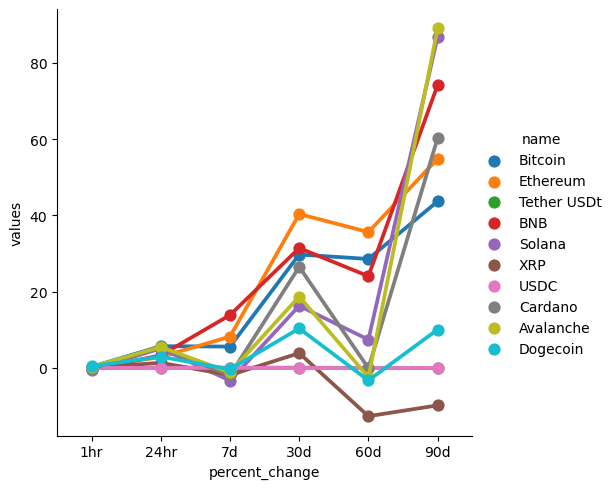

In [40]:
sns.catplot(x='percent_change', y ='values', hue='name', data=df7,kind='point')